In [114]:
from keras.models import load_model
from keras.preprocessing.image import  load_img, image, ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
import numpy as np
from lime.lime_image import LimeImageExplainer
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries
import os

In [185]:
cwd =  os.path.abspath('')

model = load_model(cwd + "/model_11-11-2019_hyperas.h5")
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [186]:
random_seed = 0
segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=4,
                                                    max_dist=200, ratio=0.2,
                                                    random_seed=random_seed)

#segmentation_fn = SegmentationAlgorithm('felzenszwalb', scale=1,
                                                    #sigma=0.8, min_size=20)

In [198]:
path = 'C:\\Users\\pstanfel_a\\Documents\\CSCI 575\\Applied Project\\code\\0xDEADBEEFCAFE\\python\\pneumonia\\data\\test\\PNEUMONIA\\person47_virus_99.jpeg'

path = 'C:\\Users\\pstanfel_a\\Documents\\CSCI 575\\Applied Project\\Pneumonia-right-middle-lobe-4.jpg'

# this one has good results when setting min_weight to capture only the heaviest weighted superpixel
path = 'C:\\Users\\pstanfel_a\\Documents\\CSCI 575\\Applied Project\\Pneumonia-CXR.png'

path = 'C:\\Users\\pstanfel_a\\Documents\\CSCI 575\\Applied Project\\76052f7902246ff862f52f5d3cd9cd_big_gallery.jpg'

test_image = load_img(path, target_size=(255,255,3))
test_image = image.img_to_array(test_image)
test_image = test_image * (1. / 255)
test_image = np.expand_dims(test_image, axis=0)
explainer = LimeImageExplainer()

In [199]:
explanation = explainer.explain_instance(test_image[0], model.predict_proba, labels=["NORMAL", "PNEUMONIA"], 
                                         top_labels=2, num_samples=100, random_seed=0, segmentation_fn = segmentation_fn)

[[0]]


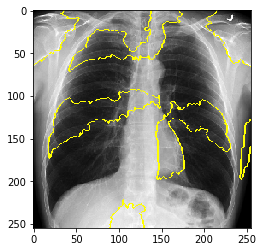

In [202]:
print(model.predict_classes(test_image))

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True,hide_rest=False, num_features=10,
                                           min_weight=0)
plt.imshow(mark_boundaries(temp, mask))
plt.show()

In [201]:
explanation.local_exp

{0: [(28, -0.19042759004241275),
  (6, 0.1814298266688993),
  (3, 0.16170328248902108),
  (9, -0.13840303221792188),
  (29, -0.13588332483913407),
  (0, -0.13145981988886463),
  (30, -0.11629790811876684),
  (1, -0.10367532706792804),
  (24, -0.08384334352318133),
  (16, 0.0756522928817396),
  (7, -0.0749575906196993),
  (18, -0.06221873502630757),
  (8, -0.053932298165736726),
  (21, 0.047546187036812786),
  (15, 0.03120390151772021),
  (2, 0.030766622842954085),
  (17, -0.027831381910200858),
  (32, -0.026817513951315562),
  (23, 0.02147577086302356),
  (13, 0.019968059356746216),
  (31, 0.017649565729687688),
  (12, -0.01653371097566139),
  (5, 0.012740194841581535),
  (4, -0.010834722382906779),
  (10, 0.010107370082508928),
  (20, -0.00692234493338486),
  (14, 0.006809879612384075),
  (33, -0.005658550511117273),
  (34, 0.005230446602216029),
  (11, 0.0048011537907585574),
  (19, 0.004661230541281091),
  (27, 0.00457222903768865),
  (25, -0.0014174827529214295),
  (26, -0.00124167